<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transfection-Model" data-toc-modified-id="Transfection-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transfection Model</a></span><ul class="toc-item"><li><span><a href="#Estimating-the-first-stage" data-toc-modified-id="Estimating-the-first-stage-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Estimating the first stage</a></span></li><li><span><a href="#Second-Stage-results" data-toc-modified-id="Second-Stage-results-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Second Stage results</a></span></li><li><span><a href="#Plotting-predictions" data-toc-modified-id="Plotting-predictions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plotting predictions</a></span></li></ul></li></ul></div>

### Transfection Model

We use a published model and dataset that describes protein translation dynamics
when single-cells are transfected with mRNA (Fröhlich, Reiser, et al. 2018).
We choose this study for three reasons. First, the dataset is of good quality; it
consists of two experiments we call eGFP and deGFP, with 263 and 394 cells.
In both experiments, the individual cells were tracked for 30 h, measured every
2 minutes. Second, the experiments differ in a process that could be related
directly to the mechanistic model. The fluorophore used in the deGFP experiment
degraded faster than the one in eGFP experiment. This known difference
in the dataset makes it a good case study to test if the difference between the
experiments can be detected in the right parameter of the model. Lastly, the
authors reported a discrepancy in the estimates obtained in their model using
Laplace approximation and Naive Two Stage (NTS). The parameters estimated
with Laplace approximation were more constrained than the estimates from the
NTS. This made us wonder how the GTS performs while inferring NLMEs with
with multiple experiments. The model files, datasets and results reported by the authors (Fröhlich, Reiser, et al. 2018) were retrieved from the data repository
accompanying their manuscript.


We now analyze a published study on single-cell translation kinetics after mRNA transfection  \citep{frohlich2018multi} and assess the modeling assumptions used in the study, with EBEs and uncertainties of the parameter estimates of individual cells. To do so, we first estimate the NLME model using the GTS. The authors used micro-patterned protein arrays and scanning time-lapse microscopy for 30 h to study the translation dynamics after incubating the cells with mRNA lipoplexes. The mRNA (modeled as a unit-less species, due to non-dimensionalizing by the authors) is taken up by a single-cell at a time $t_0$ ($h$) and is degraded by the cell at rate $\delta$ ($h^{-1}$). The uptake of mRNA is modeled as a bolus injection at time $t_0$. After internalizing the mRNA, a cell translates them into proteins. The protein concentration (in AU) was monitored with the fluorescence of GFP in each cell, either using eGFP or deGFP (destabilized eGFP) in separate experiments. The fluorescence of GFP is modeled with a rate constant $k_{2}\_m_{0}\_scale$ (AU$\cdot h^{-1}$ ). The $ k_{2}\_m_{0}\_scale$ is a lumped parameter that accounts for protein production, amount of mRNA taken up by the cell, and a proportionality constant that relates GFP molecules to fluorescence.  Lastly, the GFP molecules get degraded at a rate of $\gamma$ ($h^{-1}$). The ODE system is 
\begin{align*}
\frac{\text{dmRNA}}{\text{dt}} =& - \delta \cdot \text{mRNA}+\text{u(t)},\\
\frac{\text{dGFP}}{\text{dt}} = & k_{2}\_m_{0}\_scale \cdot \text{mRNA} - \gamma \cdot \text{GFP}. 
\end{align*}


The initial conditions of the system are
\begin{align*}
&\text{mRNA}(0)=0,\\
&\text{GFP}(0)=0,
\end{align*}
and the input $u(t)$ models the transfection of mRNA at $t_0$ in each cell as

\begin{align*}
\text{u(t)}= 
\begin{cases}
   1& \text{if } t=t_0\\
    0              & \text{otherwise}.
\end{cases}
\end{align*}

The measurement $y$ is modeled as

$y=\ln(\text{GFP} + {offset}),$

where ${offset}$ (AU), represents the background fluorescence. Therefore, the model consists of five parameters for each cell: $\delta$, $\gamma$,  $k_{2}\_m_{0}\_scale$, $t_0$ and ${offset}$. The observed cell-to-cell variability was modeled by varying the five parameters across the population, by assuming that the logarithm of the parameters is distributed normally with unknown mean and diagonal covariance  matrix \footnote{Throughout the main text all estimates of population variances and correlations are reported  for the $\ln$ transformed cell-specific parameters, unless explicitly mentioned. For ease of reading, we do not explicitly write $`\ln'$ before the parameter names. All plots of the distributions of  EBEs or individual parameters are also plotted on $\ln$ scale unless explicitly mentioned.}. Only the mean and variation of the degradation constant of GFP ($\gamma$) was assumed to be different in both the experiments. Therefore, in total, six means and six variance terms need to be estimated for the population-level model. 


#### Estimating the first stage 
To estimate the model, we run the script `FitTransfection2018`. 

The results are stored in `ResultsNLME` for both the experiments. The contents of the result file are: 

In [1]:
addpath(genpath('../Model'))
addpath(genpath('../../../Src/'))
addpath(genpath('../../../Dependencies/AMICI'))




myModelsettings=eval('ModelSettings');

whos -file ../ResultsNLME/AR_pool_1_Result_Transfection2018_Data_deGFP.mat
%

  Name                        Size               Bytes  Class     Attributes

  AR_scaling                  1x1                  120  cell                
  Model                       1x1                10984  struct              
  convergene_values           1x1                  896  struct              
  cptime                      1x1                    8  double              
  cpu_end                    50x1                  400  double              
  ids                       394x1                 3152  double              
  sigma2_sqrt                 1x1                  120  cell                
  singlecell_estimates        1x394            3259606  struct              
  theta_hat                   1x1                  120  cell                
  theta_hat_sigma             1x1                  120  cell                



We load the result for `deGFP` experiment and then take a closer look at the `singlecellestimates`. This is a struct that contains the results for all the single cells . In this experiment we have 394 cells. 

In [2]:
load('../ResultsNLME/AR_pool_1_Result_Transfection2018_Data_deGFP.mat')
singlecell_estimates


singlecell_estimates = 

  1x394 struct array with fields:

    t
    dat
    params
    obs_y
    FIM
    Hessian
    int_opts
    exflg
    fval
    cell_ID
    PopulationID
    residuals
    measurement_sd



As an example, let us plot the trajectories of all cell number 10. 

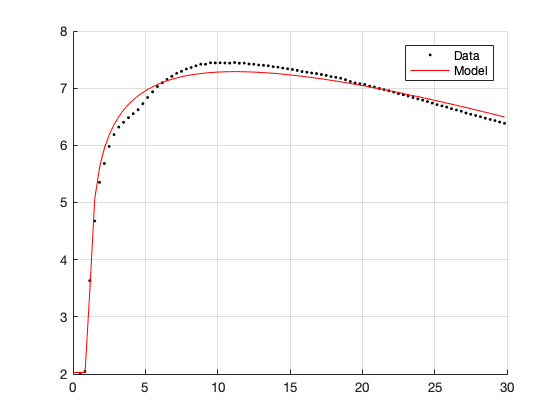

In [3]:
plot(singlecell_estimates(10).t,singlecell_estimates(10).dat.Y,'.k')
hold on
plot(singlecell_estimates(10).t,singlecell_estimates(10).obs_y,'-r')
grid on
box off
legend({'Data','Model'})

Let us plot all the parameters from all the cells.

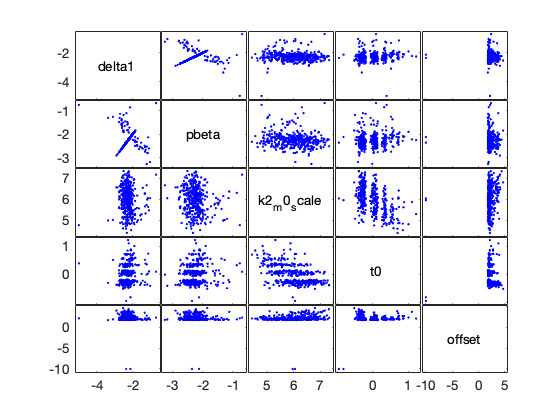

In [4]:
singlecellparams=cat(1,singlecell_estimates.params);
gplotmatrix(singlecellparams,[],[],[],[],[],[],'variable',myModelsettings.paramNames);

In [6]:
% Maximum relative difference between 
% estimates of successive iterations, 
% for noise parameters in col. 1 and 
% single-cell parameter estimates in column 2)
convergene_values.diffs


ans =

    0.5000    2.4034
    1.7500    2.6171
    0.7500    0.0244
    2.0000    0.0090



In [7]:
% The measurement error parameter:
theta_hat_sigma


theta_hat_sigma =

  1x1 cell array

    {[0.1357]}



In [ ]:
% Getting the eigen vectors corresponding to the most uncertain direction (lowest eigenvalue of the Hessian)
[ev_uncertain_direction, eigvec,eigval]=getUncDirections(singlecell_estimates(1).Hessian)

#### Second Stage results 


Result = 

  struct with fields:

          PopCovar: [5x5 double]
        eBayesEsts: [630x5 double]
           PopMean: [-2.0913 -2.9896 -2.4308 5.8473 0.0267 2.1881]
          allMeans: [6x7 double]
           allVars: [25x7 double]
      cluster_prob: []
             niter: 7
           rblitys: []
        Likelihood: 1.7298e+03
         designMat: [5x6x630 double]
             invCi: [5x5x630 double]
    covariate_flag: [1x630 double]
          cell_IDs: [630x1 double]



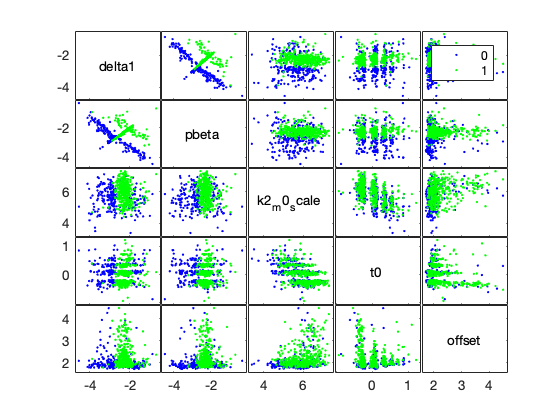

In [8]:
load('../ResultsNLME/Ex8_GTS_Result_Transfection2018_Data_eGFPData_deGFP-LGTS_EM-full.mat')
Result
gplotmatrix(Result.eBayesEsts,[],Result.covariate_flag',[],[],[],[],'variable',myModelsettings.paramNames);

When we use an optimizer instead, as we did in example 4, with both experiments:  

In [9]:
load('../ResultsNLME/Ex4_GTS_Result_Transfection2018_Data_eGFPData_deGFP-Optimizer-full.mat')

% Display the options
SSoptions

% Display the Results
Result


SSoptions = 

  struct with fields:

      Optimization: 'Optimizer'
       CovariateFn: @getAimultiExp
          inpfiles: {'Data_eGFP'  'Data_deGFP'}
    covariate_flag: [1x630 double]
             DiagD: 'full'
         jointExps: 1
      initialbeta0: [-2 -2.4000 -2.7000 5 0.1037 2.0328]
         initialD0: [6x6 double]
      fname_append: 'Ex4_'
                EM: [1x1 struct]
             optim: [1x1 struct]
           objOpts: [1x1 struct]
          ncluster: 1
            pNames: {'delta1'  'pbeta'  'k2_m0_scale'  't0'  'offset'}


Result = 

  struct with fields:

           PopMean: [-2.2460 -2.7192 -2.2784 5.8453 0.0259 2.1855]
          PopCovar: [5x5x2 double]
        eBayesEsts: [630x5 double]
    covariate_flag: [1x630 double]
          cell_IDs: [630x1 double]



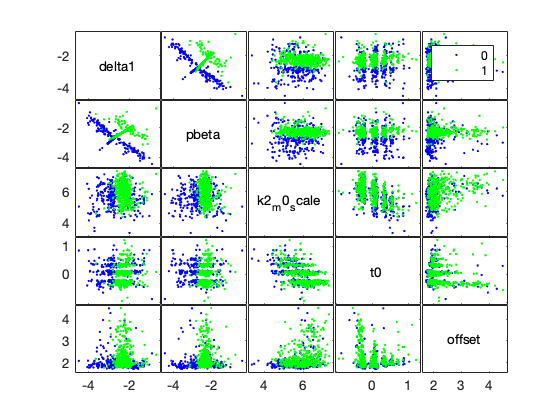

In [10]:
gplotmatrix(Result.eBayesEsts,[],Result.covariate_flag',[],[],[],[],'variable',myModelsettings.paramNames);

#### Plotting predictions

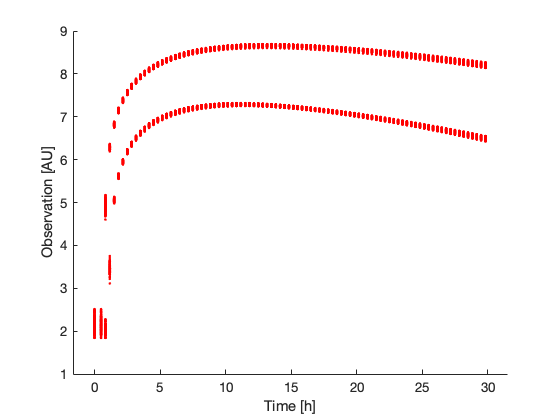

In [42]:
[simulatedData,observedData]= PlotCellPredictions(singlecell_estimates,1,100,Model);
gscatter(simulatedData.Time,simulatedData.Y)
ylabel('Observation [AU]')
xlabel('Time [h]')
box off

hold on
[simulatedData,observedData]= PlotCellPredictions(singlecell_estimates,10,100,Model);
gscatter(simulatedData.Time,simulatedData.Y)


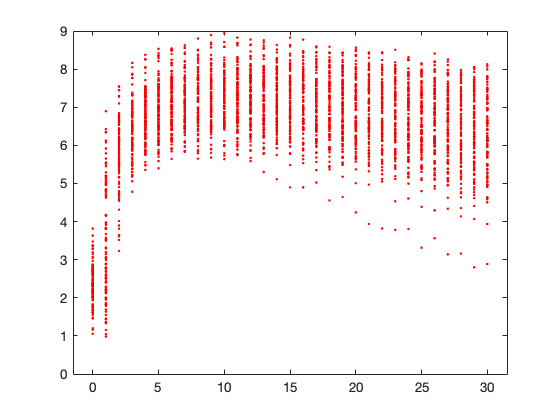

In [68]:
load('../ResultsNLME/Ex1_GTS_Result_Transfection2018_Data_deGFP-Optimizer-full.mat')
addpath(genpath('../../../Src/'))
simulatedPopdata=PlotPopPredictions(Result,theta_hat_sigma,Model,0:30,100);
gscatter(simulatedPopdata.Time,simulatedPopdata.Y)